# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

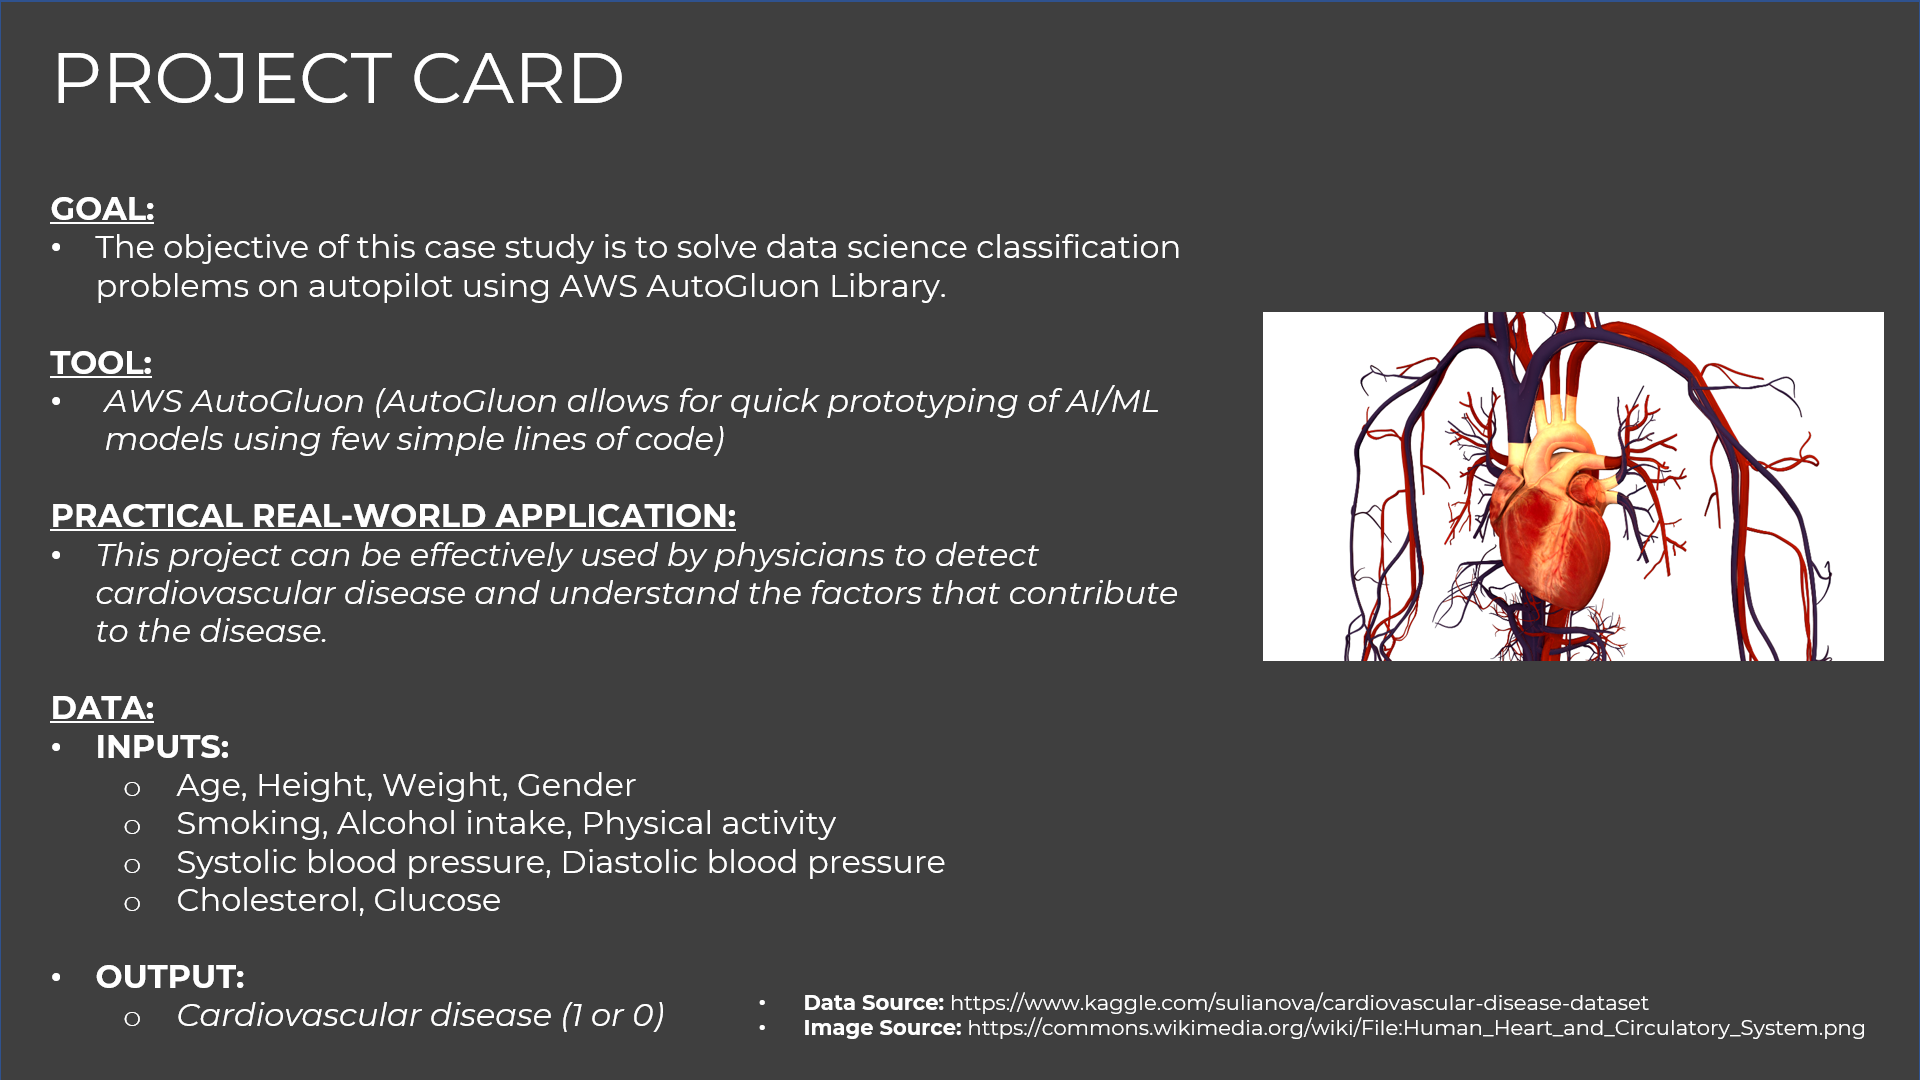

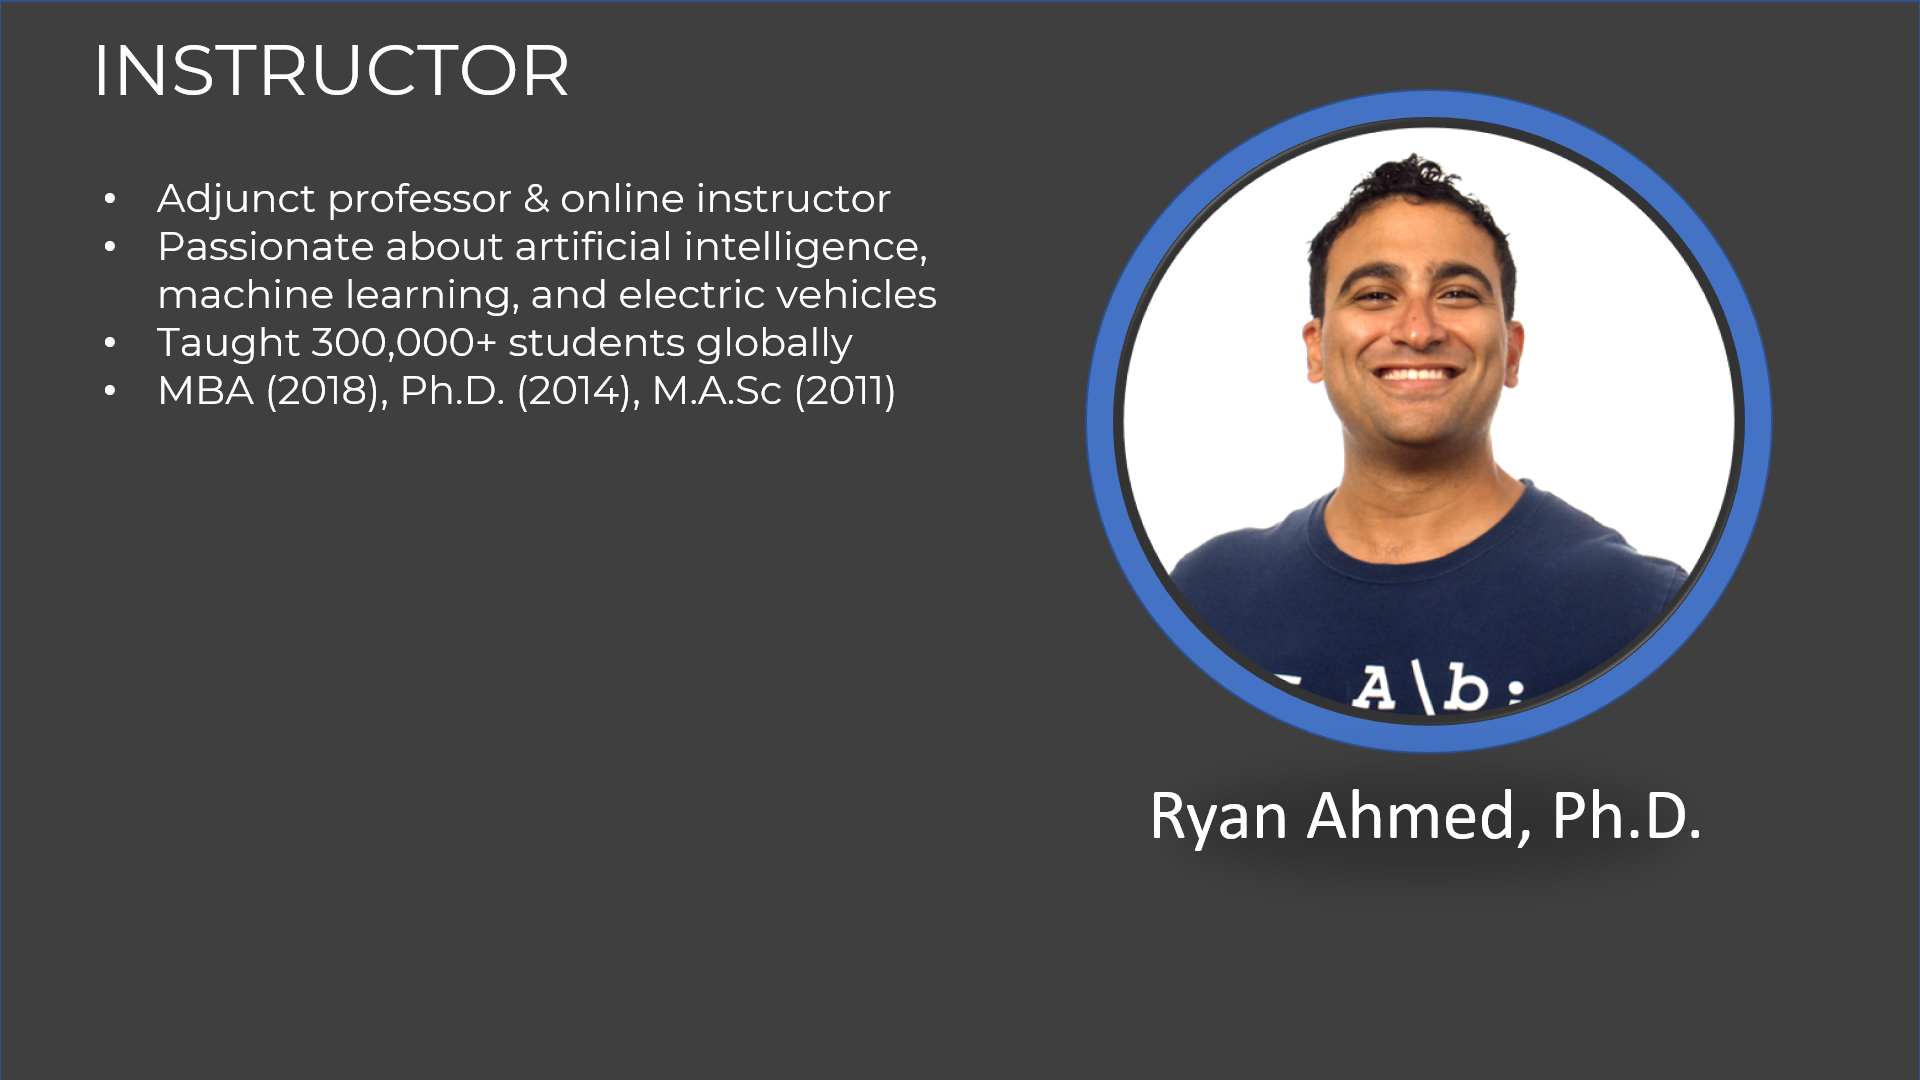

# TASK #2: IMPORT DATASETS & INSTALL AWS AUTOGLUON

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [2]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached numpy-1.16.6-cp37-cp37m-win_amd64.whl (11.9 MB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\administrator\\appdata\\roaming\\python\\python37\\site-packages\\~~mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



     --------------------------------------- 14.0/14.0 MB 65.5 MB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 63.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of bcrypt to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of attrs to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 58.8/58.8 kB ? eta 0:00:00
INFO: pip is looking at multiple versions of atomicwrites to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of requests to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 62.8/62.8 kB ? eta 0:00:00
     ---------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.1.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.6.3 which is incompatible.
mxnet 1.7.0.post2 requires numpy<1.17.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
mxnet 1.7.0.post2 requires requests<2.19.0,>=2.18.4, but you have requests 2.28.1 which is incompatible.


In [4]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [5]:
df = pd.read_csv('heart_disease.csv', sep=";")

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **How many people have cardiovascular disease in the DataFrame?**

# TASK #3: EXPLORE AND VISUALIZE THE DATA

In [7]:
# Drop id
df = df.drop(columns = 'id')

In [8]:
# since the age is given in days, we convert it into years
df['age'] = df['age']/365

In [9]:
# Explore the first five rows in the DataFrame
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Explore the last five rows in the DataFrame
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [11]:
# Generate statistical summary
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Obtain dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


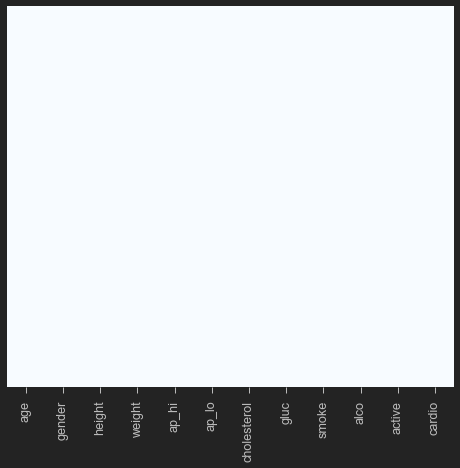

In [13]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [14]:
# check if there are any Null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

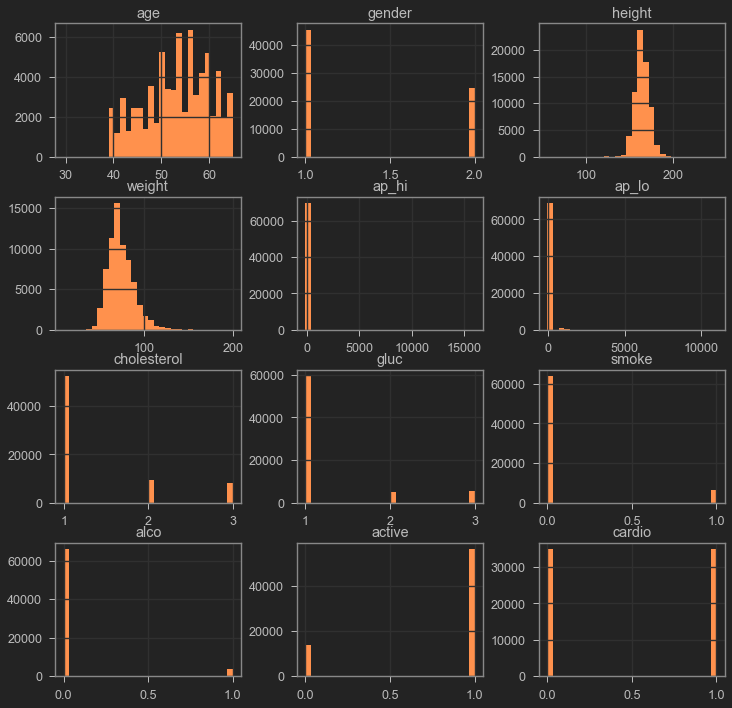

In [15]:
df.hist(bins = 30, figsize = (12, 12), color = 'y');

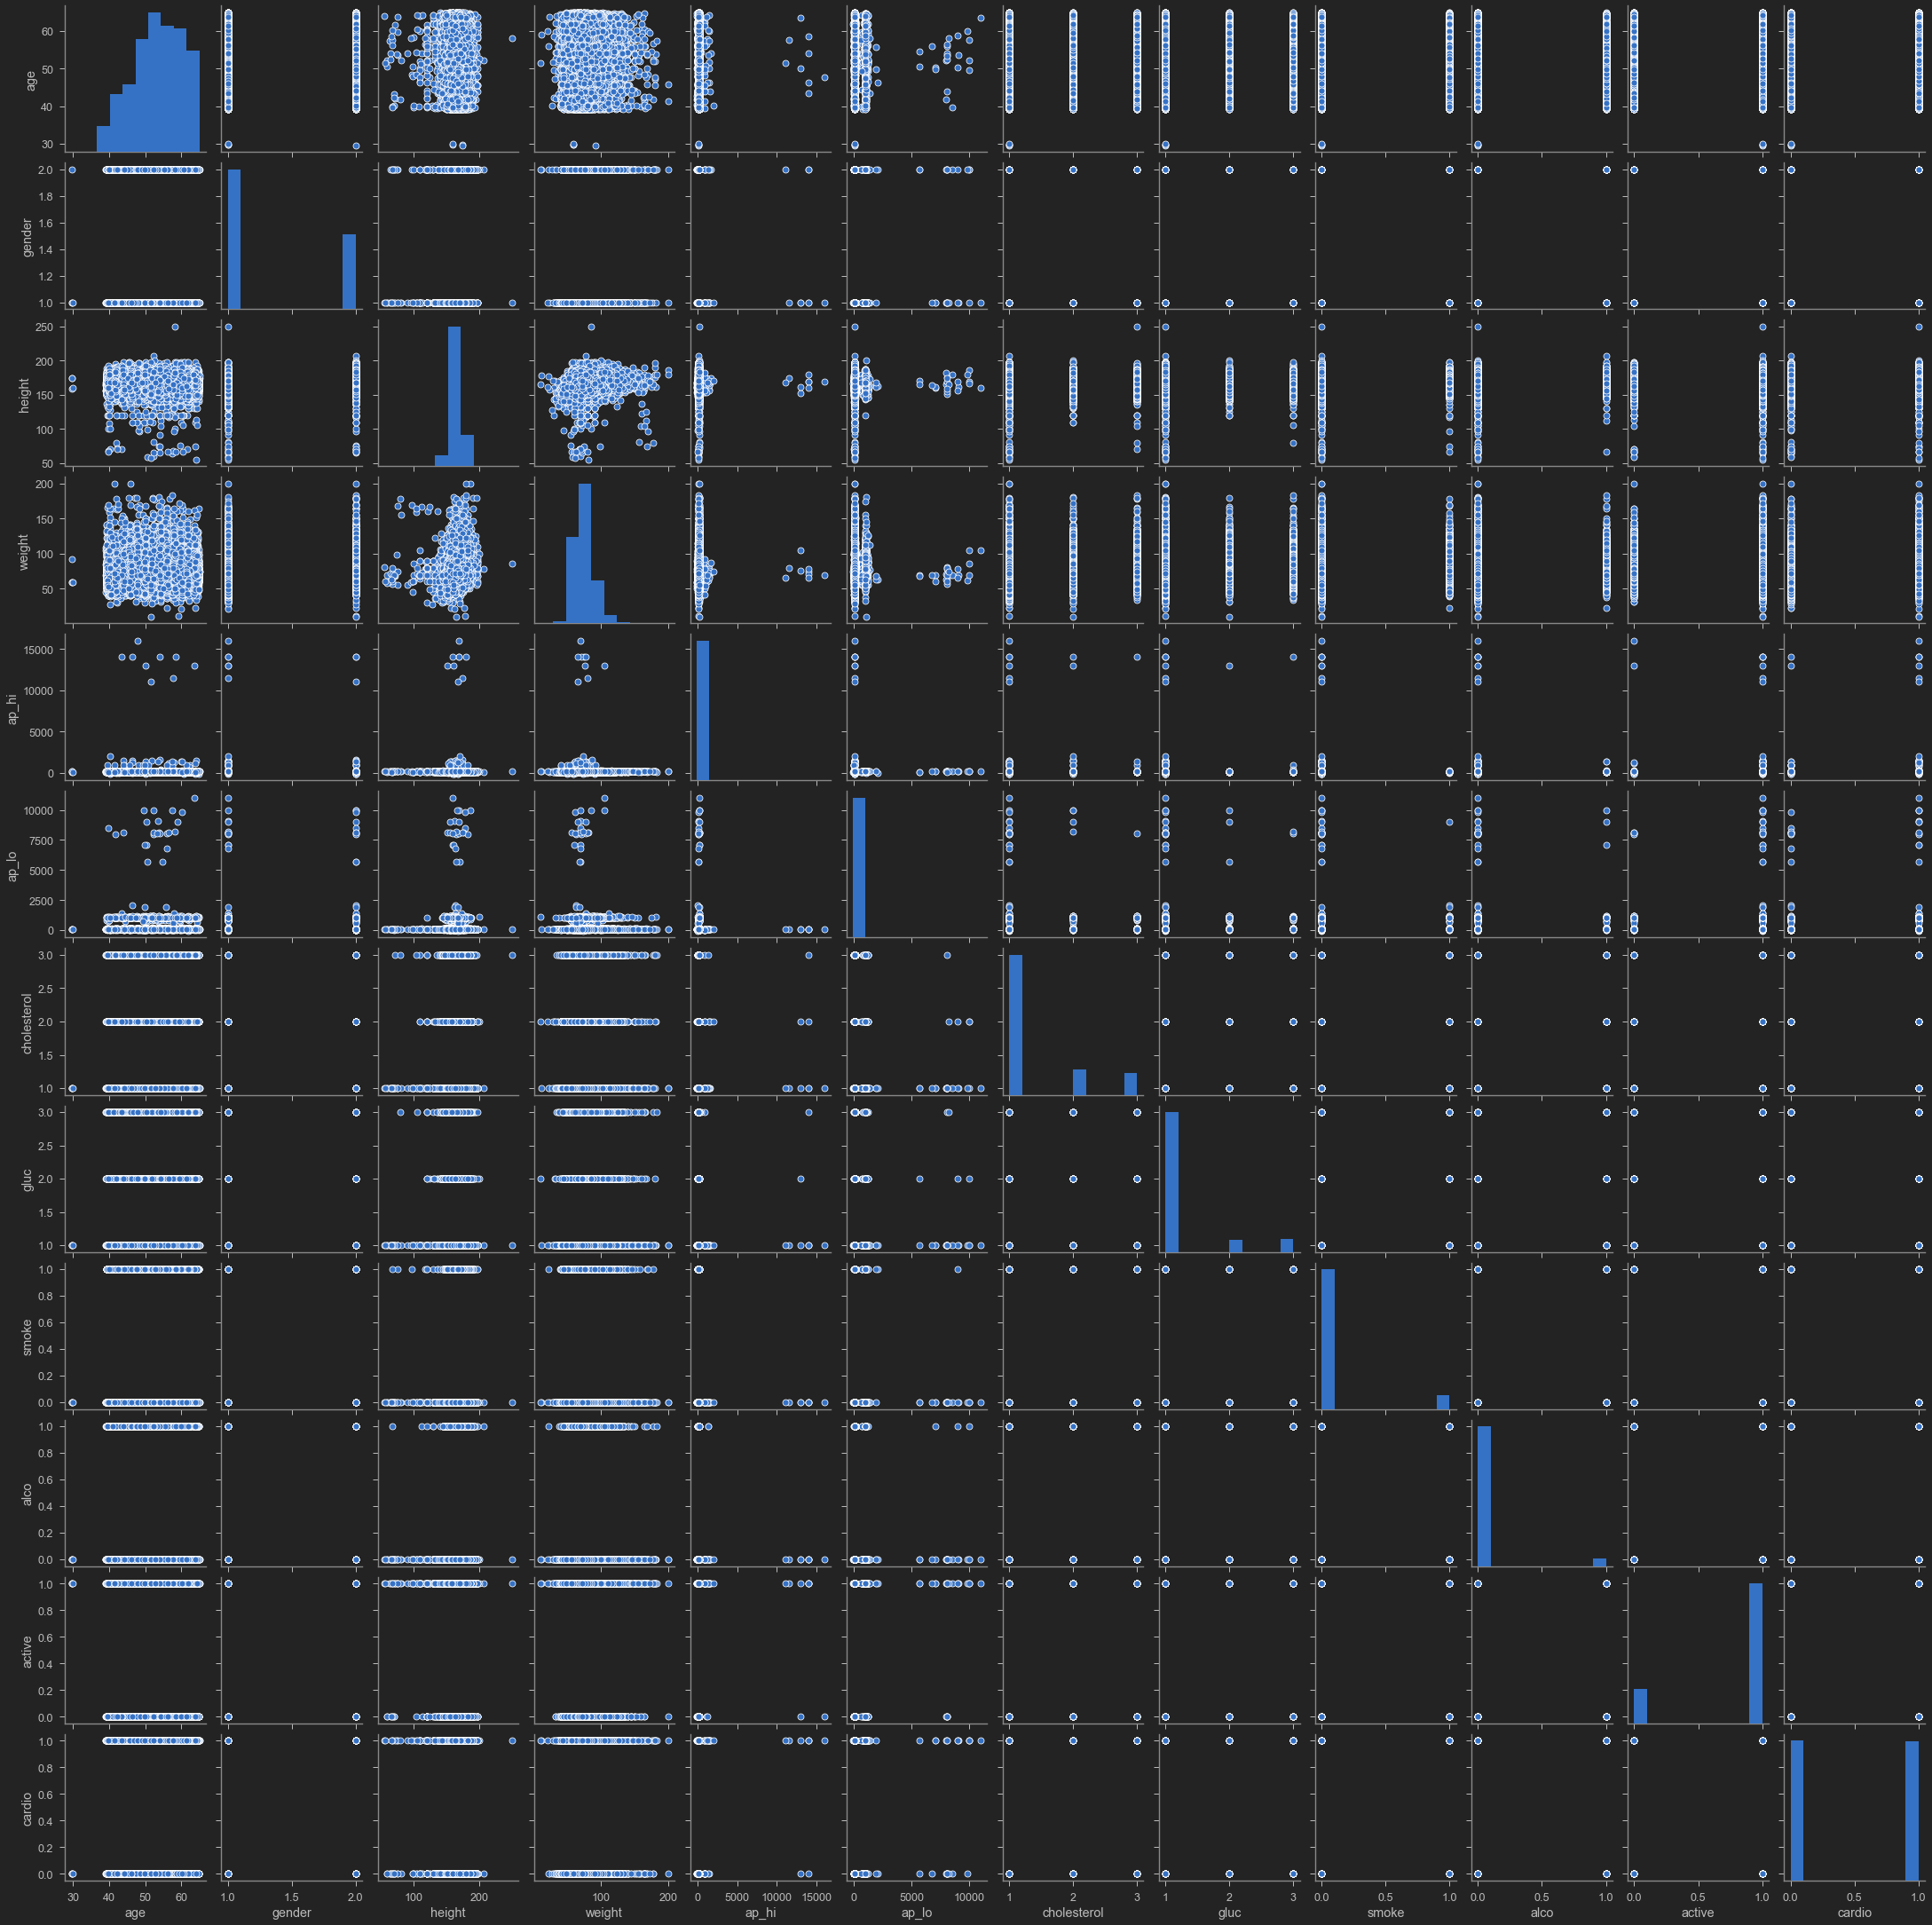

In [16]:
# plot pairplot
sns.pairplot(df);

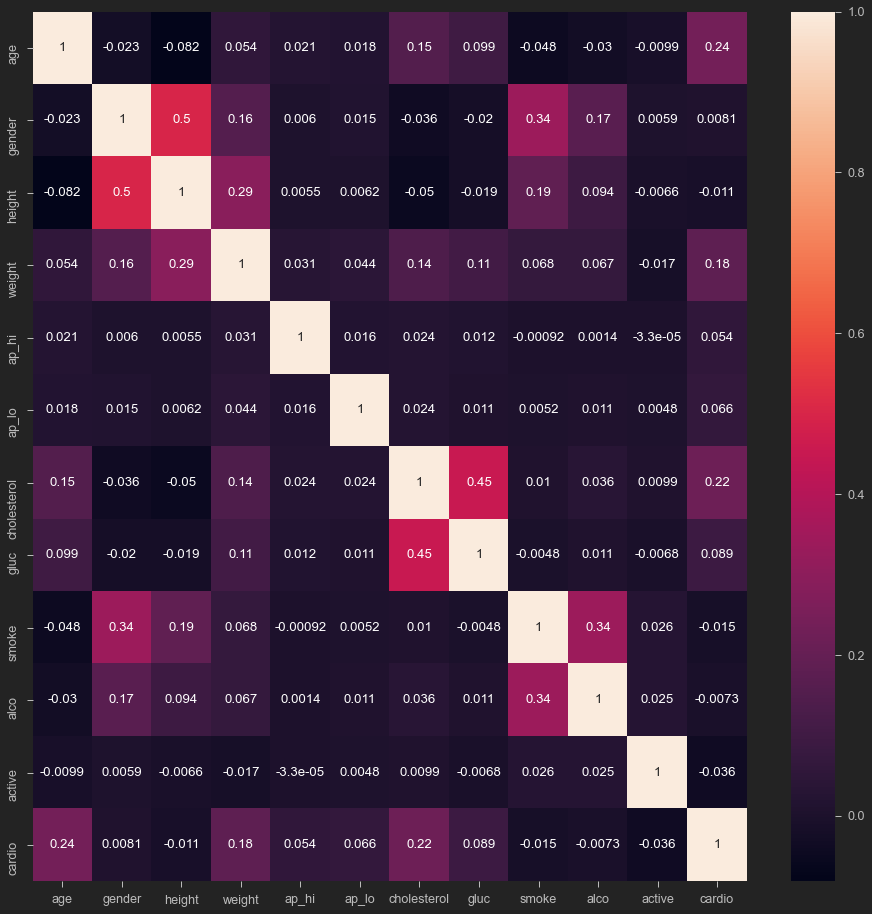

In [17]:
corr_matrix = df.corr()
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #4: UNDERSTAND AWS AUTOGLUON FUNDAMENTALS

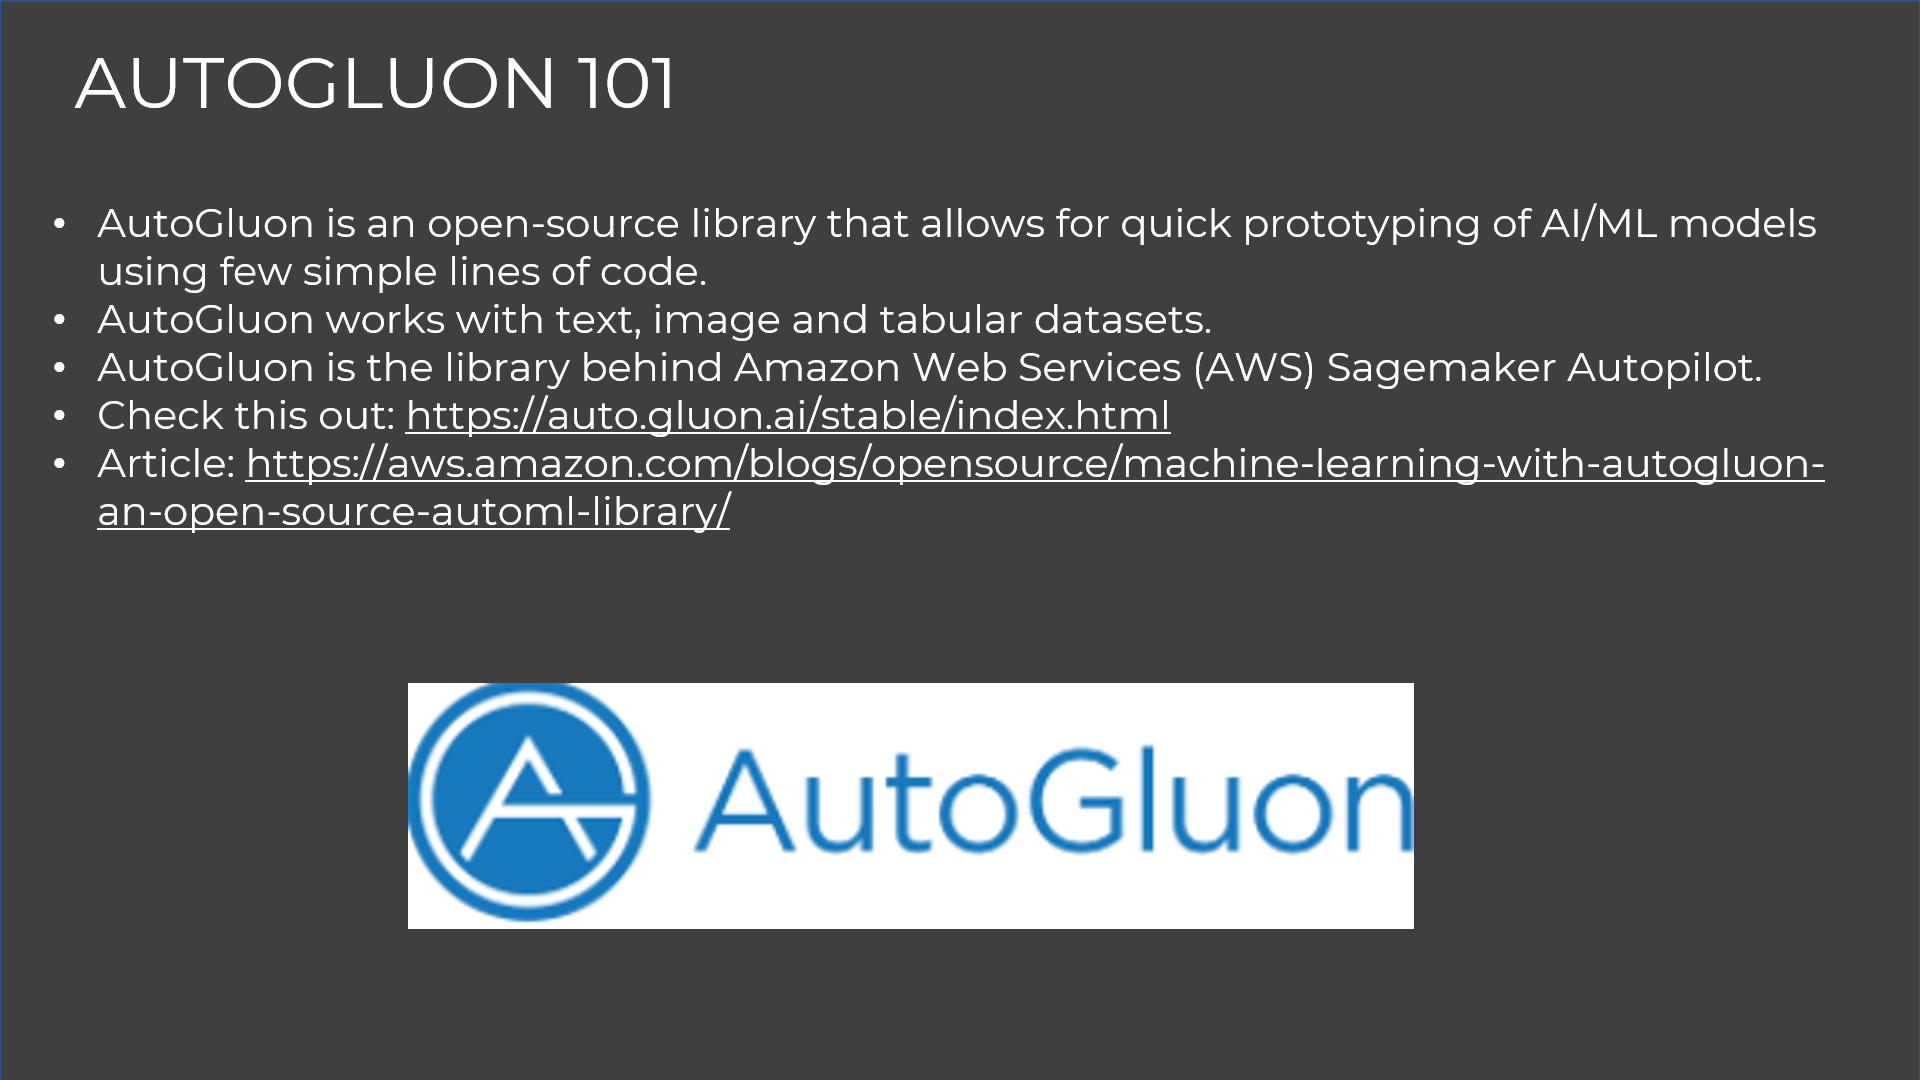

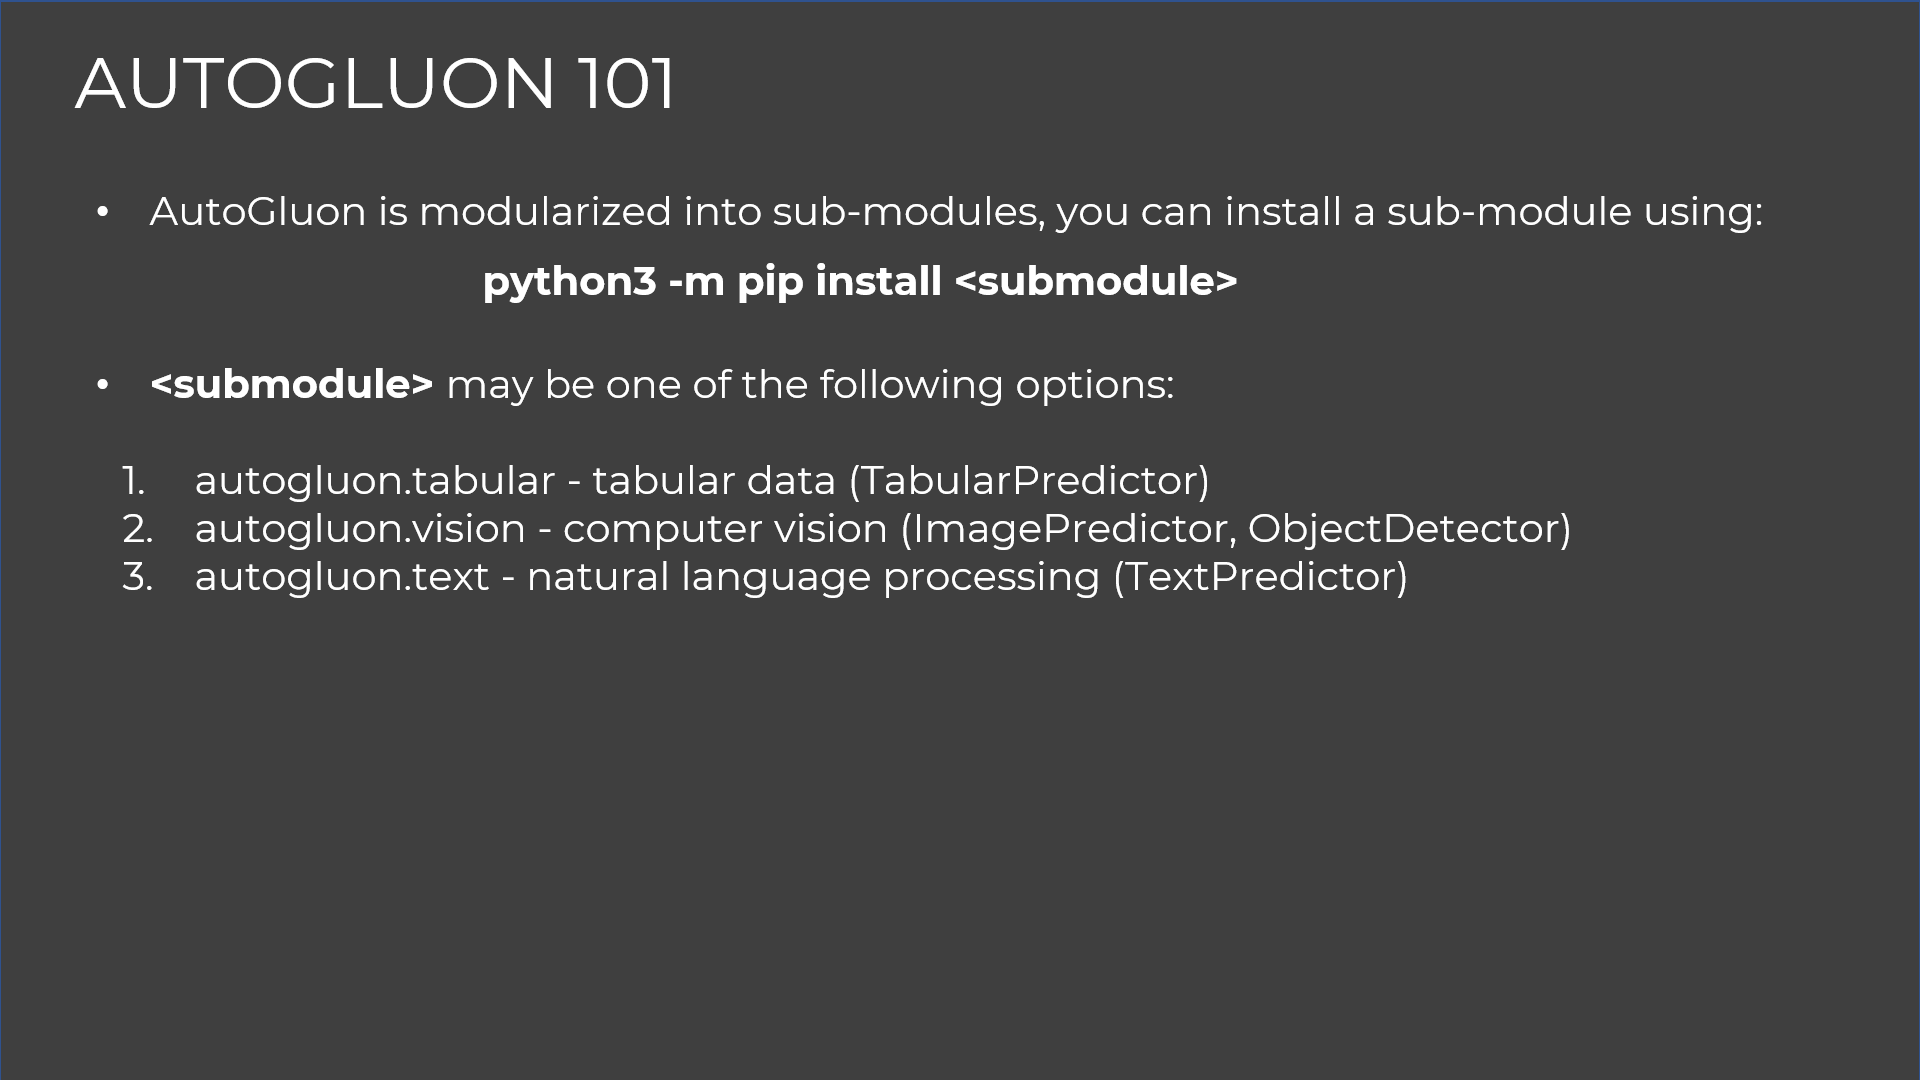

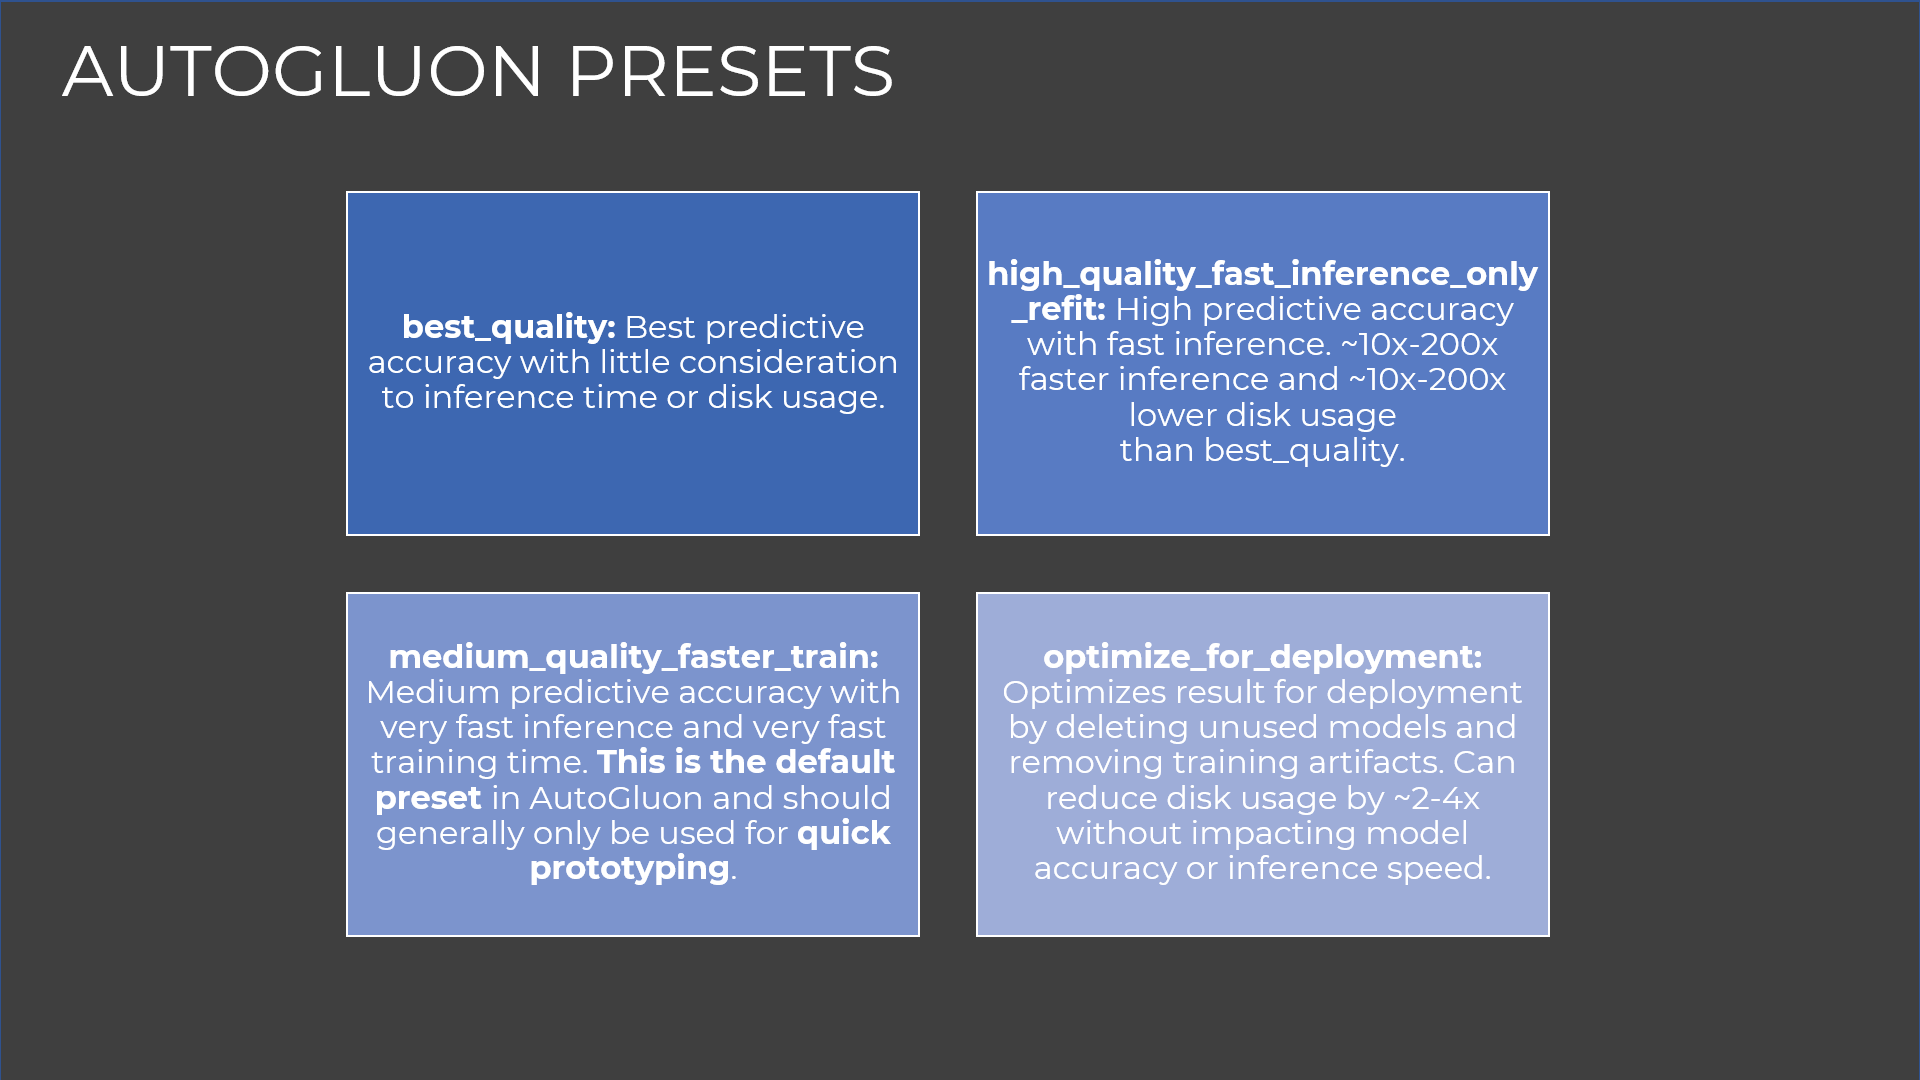

# TASK #5: TRAIN CLASSIFICATION MODELS USING AWS AUTOGLUON

In [18]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [19]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43395,64.172603,1,154,76.0,120,80,3,1,0,0,1,1
34399,53.463014,1,143,55.0,110,80,1,1,0,0,1,0
24774,57.191781,1,159,95.0,200,100,1,1,0,0,0,0
52089,46.167123,1,160,83.0,160,110,1,1,0,0,0,1
15390,54.309589,1,160,78.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21243,63.805479,1,158,76.0,120,80,3,3,0,0,0,1
45891,63.961644,2,170,122.0,130,80,3,3,0,1,1,1
42613,61.328767,2,174,72.0,120,80,1,1,0,0,1,0
43567,50.194521,1,153,85.0,120,80,1,1,0,0,1,0


In [20]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10840,41.687671,1,165,61.0,120,80,1,1,0,0,1,0
56267,54.287671,1,164,54.0,110,80,1,1,0,0,1,0
14849,56.336986,1,170,69.0,120,80,1,1,0,0,1,0
62726,45.547945,1,167,57.0,110,70,1,1,0,0,1,0
47180,39.591781,1,158,110.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29357,59.967123,1,156,100.0,160,100,3,3,0,1,1,1
52488,48.024658,1,166,80.0,100,60,1,1,0,0,1,0
9603,61.594521,2,120,68.0,150,1000,2,1,0,0,0,1
34949,40.073973,2,169,79.0,120,80,1,1,1,0,1,0


In [21]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label = "cardio", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "medium_quality_faster_train")

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_191434\"
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220801_191434\"
AutoGluon Version:  0.3.1
Train Data Rows:    56000
Train Data Columns: 11
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5629.94 MB
	Train Data (Original)  Memory Usage: 4.93 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Ident

In [22]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM     0.7372       0.016002   1.040999                0.016002           1.040999            1       True          4
1   WeightedEnsemble_L2     0.7372       0.028994   3.087990                0.012991           2.046991            2       True         11
2              CatBoost     0.7368       0.341003  19.185955                0.341003          19.185955            1       True          7
3       NeuralNetFastAI     0.7312       0.213987  98.266810                0.213987          98.266810            1       True         10
4            LightGBMXT     0.7276       0.022001   4.633003                0.022001           4.633003            1       True          3
5        ExtraTreesEntr     0.7168       0.483009  16.523960                0.483009          16.523960 

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6792,
  'KNeighborsDist': 0.674,
  'LightGBMXT': 0.7276,
  'LightGBM': 0.7372,
  'RandomForestGini': 0.7104,
  'RandomForestEntr': 0.7108,
  'CatBoost': 0.7368,
  'ExtraTreesGini': 0.7148,
  'ExtraTreesEntr': 0.7168,
  'NeuralNetFastAI': 0.7312,
  'WeightedEnsemble_L2': 0.7372},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20220801_191434\\models\\KNeighborsUnif\\',
  'KNeighborsDist': 'AutogluonModels/ag-20220801_191434\\models\\KNeighborsDist\\',
  'LightGBMXT': 'AutogluonModels/ag-20220801_191434\\models\\LightGB

# TASK #6: EVALUATE TRAINED MODELS PERFORMANCE

In [23]:
predictor.leaderboard()

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM     0.7372       0.016002   1.040999                0.016002           1.040999            1       True          4
1   WeightedEnsemble_L2     0.7372       0.028994   3.087990                0.012991           2.046991            2       True         11
2              CatBoost     0.7368       0.341003  19.185955                0.341003          19.185955            1       True          7
3       NeuralNetFastAI     0.7312       0.213987  98.266810                0.213987          98.266810            1       True         10
4            LightGBMXT     0.7276       0.022001   4.633003                0.022001           4.633003            1       True          3
5        ExtraTreesEntr     0.7168       0.483009  16.523960                0.483009          16.523960            1       True          9
6        ExtraTreesGini    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.7372,0.016002,1.040999,0.016002,1.040999,1,True,4
1,WeightedEnsemble_L2,0.7372,0.028994,3.087990,0.012991,2.046991,2,True,11
2,CatBoost,0.7368,0.341003,19.185955,0.341003,19.185955,1,True,7
3,NeuralNetFastAI,0.7312,0.213987,98.266810,0.213987,98.266810,1,True,10
4,LightGBMXT,0.7276,0.022001,4.633003,0.022001,4.633003,1,True,3
5,ExtraTreesEntr,0.7168,0.483009,16.523960,0.483009,16.523960,1,True,9
6,ExtraTreesGini,0.7148,0.517007,17.815953,0.517007,17.815953,1,True,8
7,RandomForestEntr,0.7108,0.617033,34.171915,0.617033,34.171915,1,True,6
8,RandomForestGini,0.7104,0.742001,28.271204,0.742001,28.271204,1,True,5
9,KNeighborsUnif,0.6792,0.242017,2.082992,0.242017,2.082992,1,True,1


                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM     0.7372       0.016002   1.040999                0.016002           1.040999            1       True          4
1   WeightedEnsemble_L2     0.7372       0.028994   3.087990                0.012991           2.046991            2       True         11
2              CatBoost     0.7368       0.341003  19.185955                0.341003          19.185955            1       True          7
3       NeuralNetFastAI     0.7312       0.213987  98.266810                0.213987          98.266810            1       True         10
4            LightGBMXT     0.7276       0.022001   4.633003                0.022001           4.633003            1       True          3
5        ExtraTreesEntr     0.7168       0.483009  16.523960                0.483009          16.523960            1       True          9
6        ExtraTreesGini    

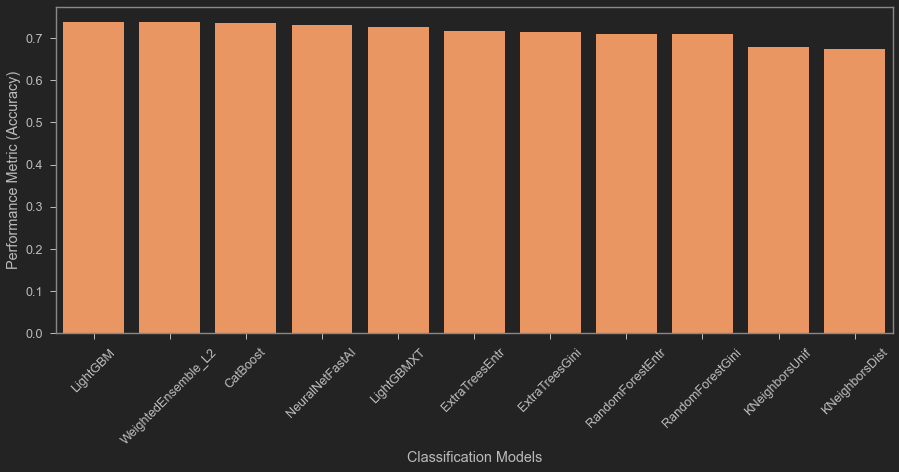

In [24]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [25]:
# assess model performance
y_pred = predictor.predict(X_test)
y_pred

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

In [26]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10840,41.687671,1,165,61.0,120,80,1,1,0,0,1,0
56267,54.287671,1,164,54.0,110,80,1,1,0,0,1,0
14849,56.336986,1,170,69.0,120,80,1,1,0,0,1,0
62726,45.547945,1,167,57.0,110,70,1,1,0,0,1,0
47180,39.591781,1,158,110.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29357,59.967123,1,156,100.0,160,100,3,3,0,1,1,1
52488,48.024658,1,166,80.0,100,60,1,1,0,0,1,0
9603,61.594521,2,120,68.0,150,1000,2,1,0,0,0,1
34949,40.073973,2,169,79.0,120,80,1,1,1,0,1,0


In [27]:
y_test = X_test['cardio']
y_test #groundtruth

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

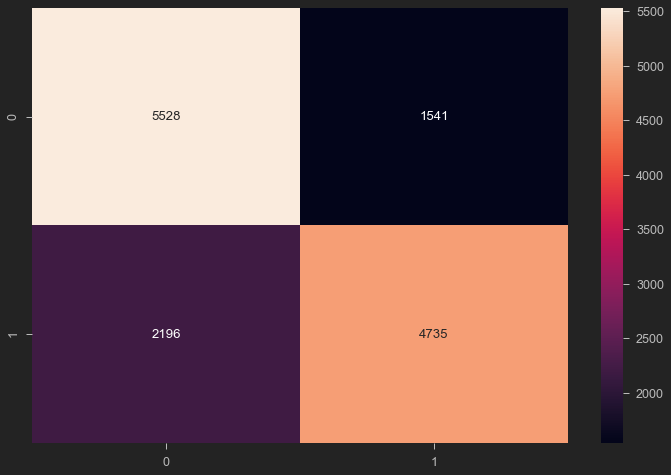

In [28]:
# Training set Performance
from sklearn.metrics import confusion_matrix

# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt = 'd', annot=True);

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7069
           1       0.75      0.68      0.72      6931

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Change the preset value to 'optimize for performance' and retrain the model**
- **Which model provides the best performance?**
- **Compare the model accuracy using various preset values** 

# FINAL CAPSTONE PROJECT

Please complete the following:
1. Load the “cancer.csv” dataset
2. Perform basic Exploratory Data Analysis
3. Split the data into 80% for training and 20% for testing 
4. Using ‘best_quality’ preset and accuracy metric, train machine linear classification models using AutoGluon to predict the “class” column 
5. Assess trained models performance by plotting the leaderboard and indicating the best model. Plot the confusion matrix

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:** 
- **How many people have cardiovascular disease in the DataFrame**

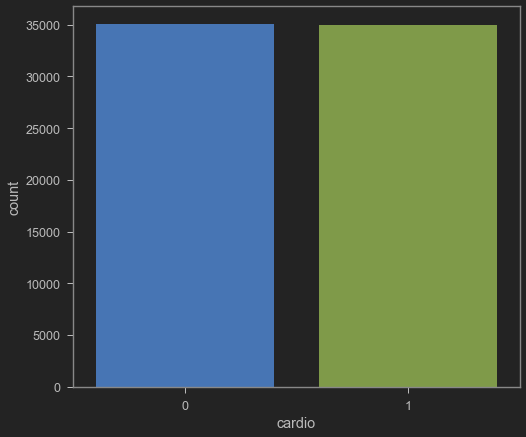

In [30]:
sns.countplot(df['cardio']);

In [31]:
df_cardio = df[df['cardio'] == 1];
df_cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
15,45.978082,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69994,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1


**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Change the preset value to 'optimize for performance' and retrain the model**
- **Which model provides the best performance?**
- **Compare the model accuracy using various preset values** 

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_191858\"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 400s
AutoGluon will save models to "AutogluonModels/ag-20220801_191858\"
AutoGluon Version:  0.3.1
Train Data Rows:    56000
Train Data Columns: 11
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5570.49 MB
	Train Data (Original)  Memory Usage: 4.93 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityF

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.7392       0.249999  156.114618                0.007995           2.606988            2       True          5
1              XGBoost     0.7376       0.024008    4.581990                0.024008           4.581990            1       True          3
2             LightGBM     0.7372       0.016003    0.864987                0.016003           0.864987            1       True          1
3             CatBoost     0.7368       0.007997    9.588974                0.007997           9.588974            1       True          2
4       NeuralNetMXNet     0.7352       0.193996  138.471678                0.193996         138.471678            1       True          4
Number of models trained: 5
Types of models trained:
{'TabularNeuralNetModel', 'CatBoostModel', 'LGBMode

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')
Evaluation: accuracy on test data: 0.7357857142857143
Evaluations on test data:
{
    "accuracy": 0.7357857142857143,
    "balanced_accuracy": 0.7352861468845984,
    "mcc": 0.4732154665811227,
    "roc_auc": 0.8020656558079041,
    "f1": 0.7195390097808779,
    "precision": 0.7582294662831576,
    "recall": 0.6846053960467465
}


{'accuracy': 0.7357857142857143,
 'balanced_accuracy': 0.7352861468845984,
 'mcc': 0.4732154665811227,
 'roc_auc': 0.8020656558079041,
 'f1': 0.7195390097808779,
 'precision': 0.7582294662831576,
 'recall': 0.6846053960467465}

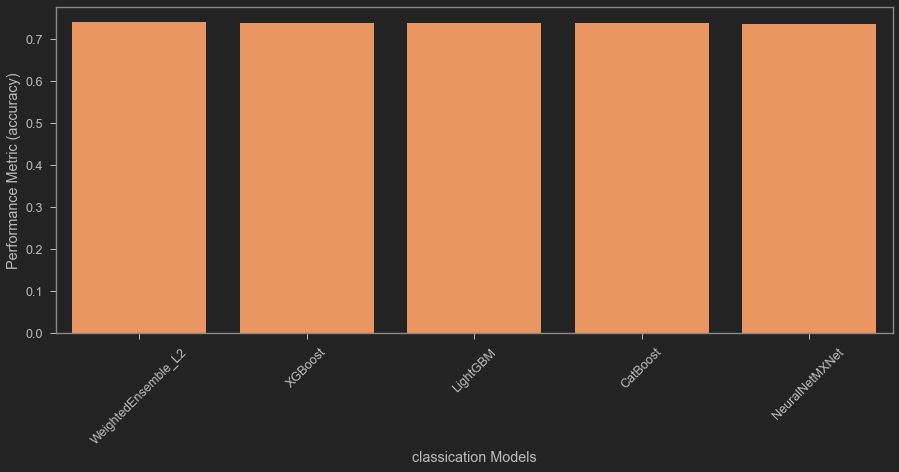

In [32]:
predictor = TabularPredictor(label = "cardio", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 400, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (accuracy)", xlabel = "classication Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)

# FINAL CAPSTONE PROJECT SOLUTION

In [33]:
# import the csv files using pandas 
cancer_df = pd.read_csv('cancer.csv')

In [34]:
# Explore the first five rows in the DataFrame
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
# Generate statistical summary
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [36]:
# Obtain dataset information
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

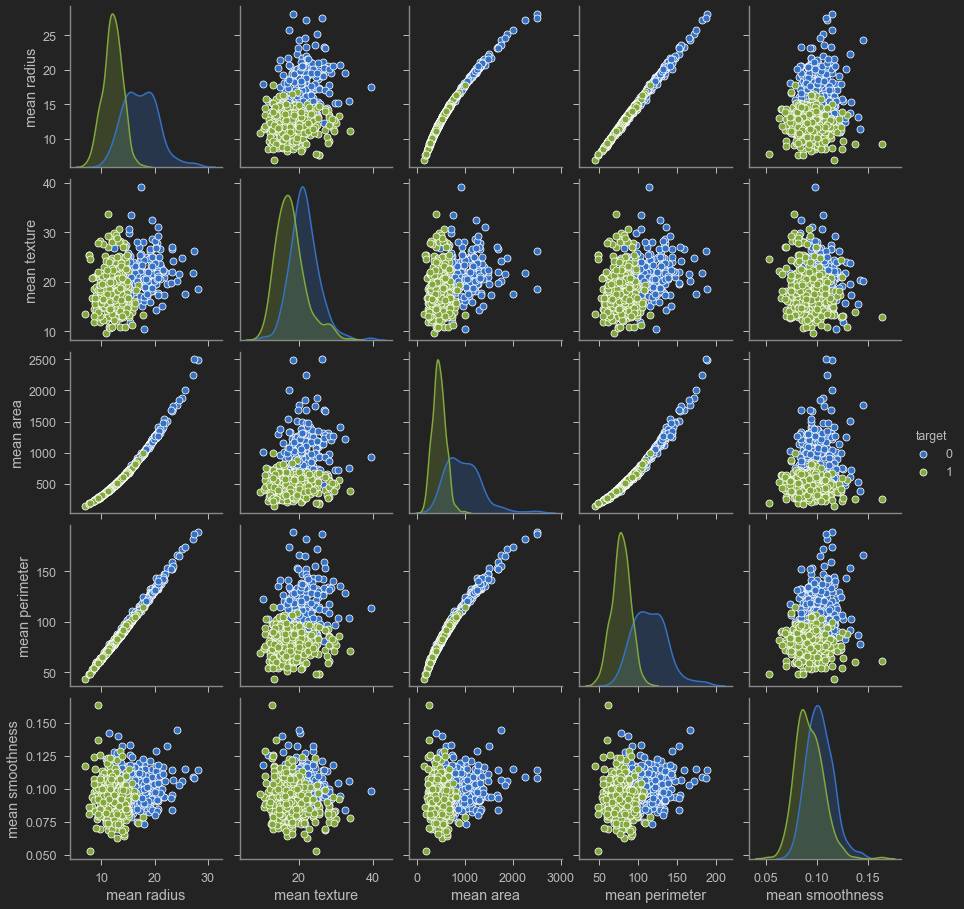

In [37]:
sns.pairplot(cancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] );

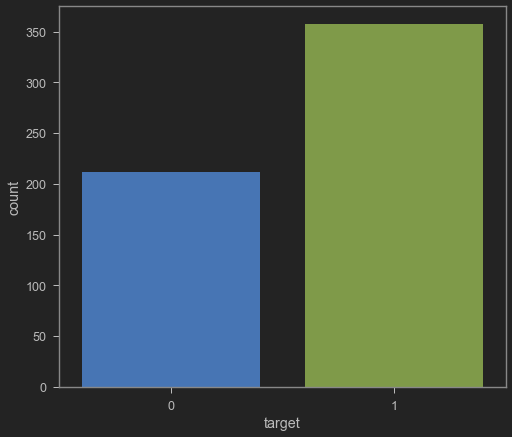

In [38]:
sns.countplot(cancer_df['target'], label = "Count"); 

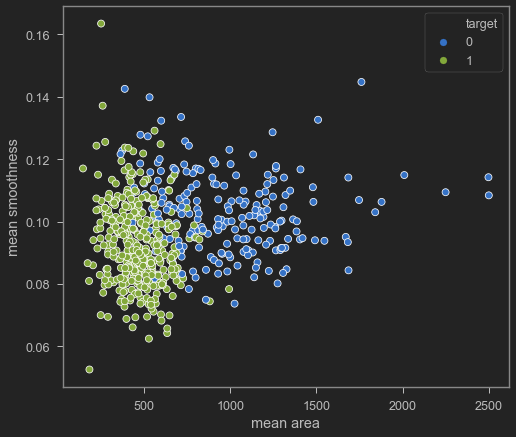

In [39]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df);

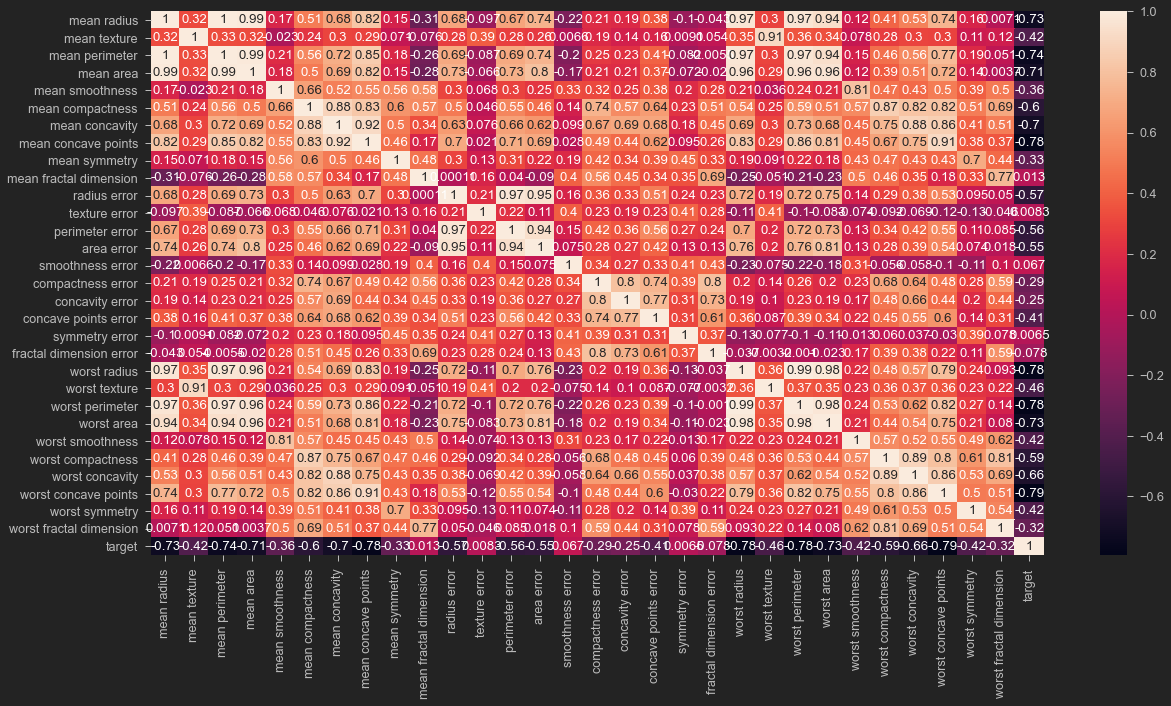

In [40]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.corr(), annot=True) 

In [41]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(cancer_df, test_size = 0.2, random_state = 0)

In [42]:
# Train multiple ML classifier models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label = "target", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_192629\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220801_192629\"
AutoGluon Version:  0.3.1
Train Data Rows:    455
Train Data Columns: 30
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5548.3 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features i

	132.73s	 = Training   runtime
	1.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 10.25s of the 10.25s of remaining time.
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 183. Best iteration is:
	[41]	train_set's binary_error: 0.010989	valid_set's binary_error: 0.032967
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecate

In [43]:
predictor.fit_summary()

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L1   0.978022       0.021025    3.706961                0.021025           3.706961            1       True          3
1       WeightedEnsemble_L2   0.978022       0.023018    4.944954                0.001994           1.237993            2       True         14
2    NeuralNetFastAI_BAG_L1   0.975824       0.175001    6.447988                0.175001           6.447988            1       True         10
3           CatBoost_BAG_L1   0.975824       0.563002   31.119877                0.563002          31.119877            1       True          7
4           LightGBM_BAG_L1   0.973626       0.027008    4.178973                0.027008           4.178973            1       True          4
5     NeuralNetMXNet_BAG_L1   0.973626       1.013996  132.733637         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9230769230769231,
  'KNeighborsDist_BAG_L1': 0.9208791208791208,
  'LightGBMXT_BAG_L1': 0.978021978021978,
  'LightGBM_BAG_L1': 0.9736263736263736,
  'RandomF

In [44]:
predictor.leaderboard()

                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L1   0.978022       0.021025    3.706961                0.021025           3.706961            1       True          3
1       WeightedEnsemble_L2   0.978022       0.023018    4.944954                0.001994           1.237993            2       True         14
2    NeuralNetFastAI_BAG_L1   0.975824       0.175001    6.447988                0.175001           6.447988            1       True         10
3           CatBoost_BAG_L1   0.975824       0.563002   31.119877                0.563002          31.119877            1       True          7
4           LightGBM_BAG_L1   0.973626       0.027008    4.178973                0.027008           4.178973            1       True          4
5     NeuralNetMXNet_BAG_L1   0.973626       1.013996  132.733637                1.013996         132.733637            1       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.978022,0.021025,3.706961,0.021025,3.706961,1,True,3
1,WeightedEnsemble_L2,0.978022,0.023018,4.944954,0.001994,1.237993,2,True,14
2,NeuralNetFastAI_BAG_L1,0.975824,0.175001,6.447988,0.175001,6.447988,1,True,10
3,CatBoost_BAG_L1,0.975824,0.563002,31.119877,0.563002,31.119877,1,True,7
4,LightGBM_BAG_L1,0.973626,0.027008,4.178973,0.027008,4.178973,1,True,4
5,NeuralNetMXNet_BAG_L1,0.973626,1.013996,132.733637,1.013996,132.733637,1,True,12
6,ExtraTreesEntr_BAG_L1,0.967033,0.193007,1.064988,0.193007,1.064988,1,True,9
7,RandomForestEntr_BAG_L1,0.964835,0.186018,1.065978,0.186018,1.065978,1,True,6
8,XGBoost_BAG_L1,0.962637,0.036013,2.881953,0.036013,2.881953,1,True,11
9,RandomForestGini_BAG_L1,0.962637,0.197007,1.272988,0.197007,1.272988,1,True,5


                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L1   0.978022       0.021025    3.706961                0.021025           3.706961            1       True          3
1       WeightedEnsemble_L2   0.978022       0.023018    4.944954                0.001994           1.237993            2       True         14
2    NeuralNetFastAI_BAG_L1   0.975824       0.175001    6.447988                0.175001           6.447988            1       True         10
3           CatBoost_BAG_L1   0.975824       0.563002   31.119877                0.563002          31.119877            1       True          7
4           LightGBM_BAG_L1   0.973626       0.027008    4.178973                0.027008           4.178973            1       True          4
5     NeuralNetMXNet_BAG_L1   0.973626       1.013996  132.733637                1.013996         132.733637            1       True    

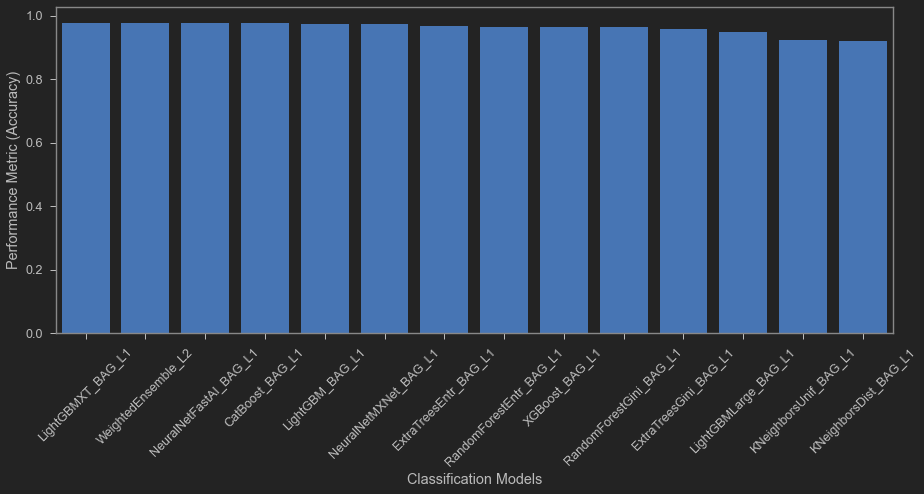

In [45]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [46]:
predictor.evaluate(X_test)

Evaluation: accuracy on test data: 0.9649122807017544
Evaluations on test data:
{
    "accuracy": 0.9649122807017544,
    "balanced_accuracy": 0.9606224198158145,
    "mcc": 0.9277492164491516,
    "roc_auc": 0.9980946332168942,
    "f1": 0.9705882352941176,
    "precision": 0.9565217391304348,
    "recall": 0.9850746268656716
}


{'accuracy': 0.9649122807017544,
 'balanced_accuracy': 0.9606224198158145,
 'mcc': 0.9277492164491516,
 'roc_auc': 0.9980946332168942,
 'f1': 0.9705882352941176,
 'precision': 0.9565217391304348,
 'recall': 0.9850746268656716}

In [47]:
# assess model performance
y_pred = predictor.predict(X_test)
y_pred

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

In [48]:
y_test = X_test['target']
y_test

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

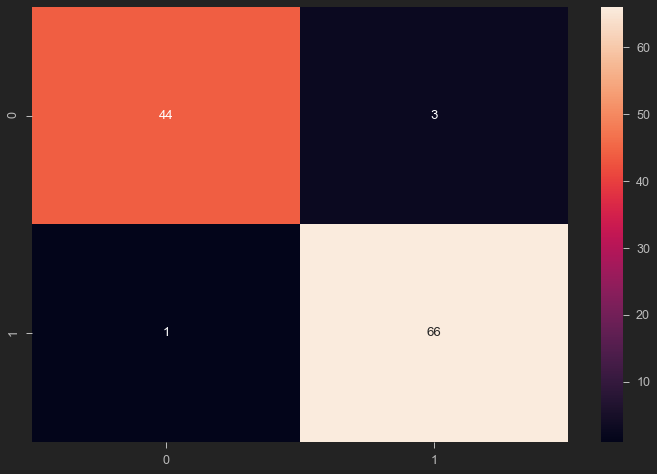

In [49]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# GREAT JOB!